In [1]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_training, execute_ai_model
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import keras
logging.basicConfig(format='%(message)s', level=logging.INFO)

In [ ]:
create_experiment_snapshots([25, 50, 75, 100])
evaluations = []

In [2]:
# Learning Parameters
epsilon = 1.0  # exploration rate
attacker_sensitivity = 1.0
# Simulator Settings
start_time = 0
finish_time = None
mtd_interval = 100
scheme = 'mtd_ai'
total_nodes = 74
new_network = True

# Batch settings
num_iterations = 10
attacker_sensitivity = 1.0

In [3]:
evaluation = execute_ai_model(start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network, model_path = '../experiments/AI_model/models_joo_kai/main_network_parameter_set_8.h5')

Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Target IP 224.0.0.251 found as host ID 60.
Neighbours of Target Ip are:[33, 31, 49, 41, 65, 28, 6, 43, 48, 0, 9]
Adversary: Start SCAN_HOST at 0.0s.
Static period: 0
Action: 4
MTD: ServiceDiversity triggered 0.0s
MTD: ServiceDiversity deployed in the network at 0.0s.
Adversary: Processed SCAN_HOST at 5.0s.
Adversary: Start ENUM_HOST at 5.0s.
Adversary: Processed ENUM_HOST at 10.0s.
Adversary: Start SCAN_PORT at 10.0s.
Adversary: Processed SCAN_PORT at 35.0s.
Adversary: Start EXPLOIT_VULN 283e3046-b3f6-44ac-a89d-20fdc629f6e6 on host 0 at 35.0s.
Adversary: Processed EXPLOIT_VULN 283e3046-b3f6-44ac-a89d-20fdc629f6e6 on host 0 at 35.4s.
Adversary: Start EXPLOIT_VULN 3398f8a4-14c0-40a8-9c67-44ff05c92553 on host 0 at 35.4s.
Adversary: Processed EXPLOIT_VULN 3398f8a4-14c0-40a8-9c67-44ff05c92553 on host 0 at 36.2s.
Adversary: Start EXPLOIT_VULN 

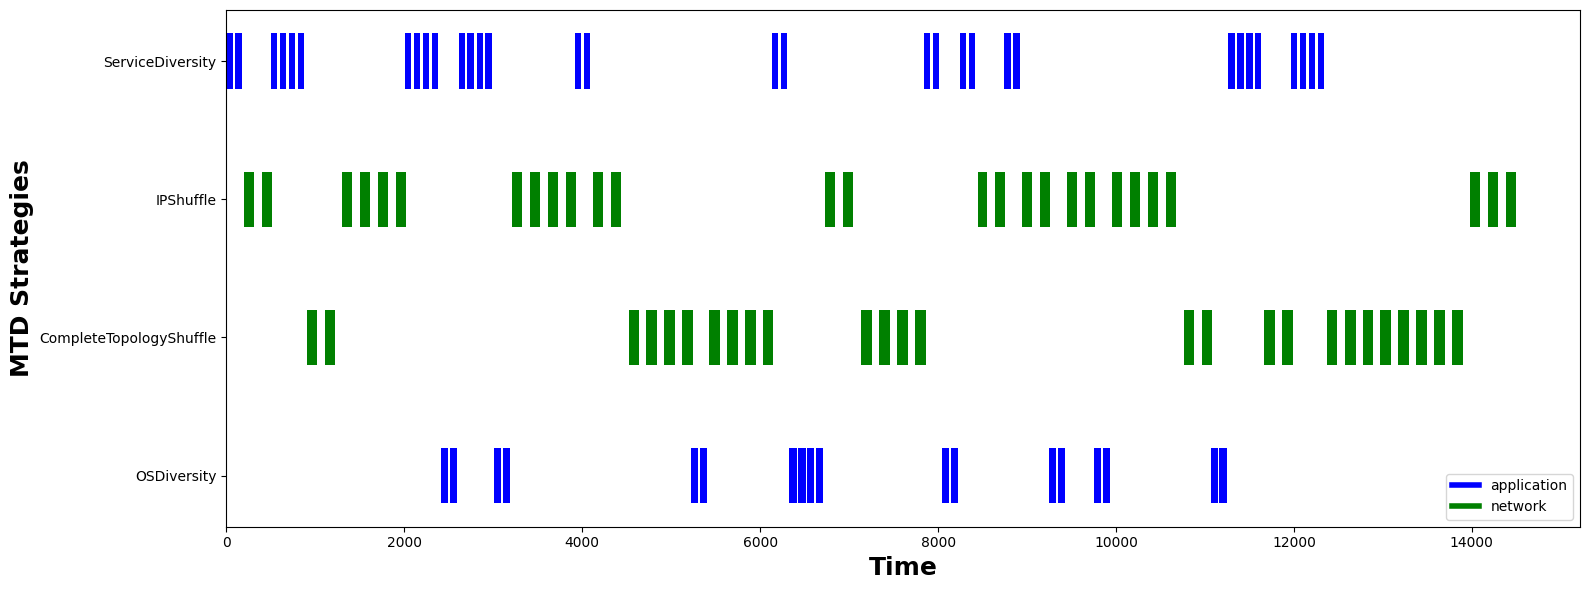

In [4]:
evaluation.visualise_mtd_operation()


In [6]:
evaluation.security_metric_record

AttributeError: 'Evaluation' object has no attribute 'security_metric_record'

In [7]:
evaluation.visualize_host_compromise_ratio()

AttributeError: 'Evaluation' object has no attribute 'security_metric_record'

In [7]:
evaluation.visualize_attack_path_exposure_score()

AttributeError: 'Evaluation' object has no attribute '_security_metric_record'

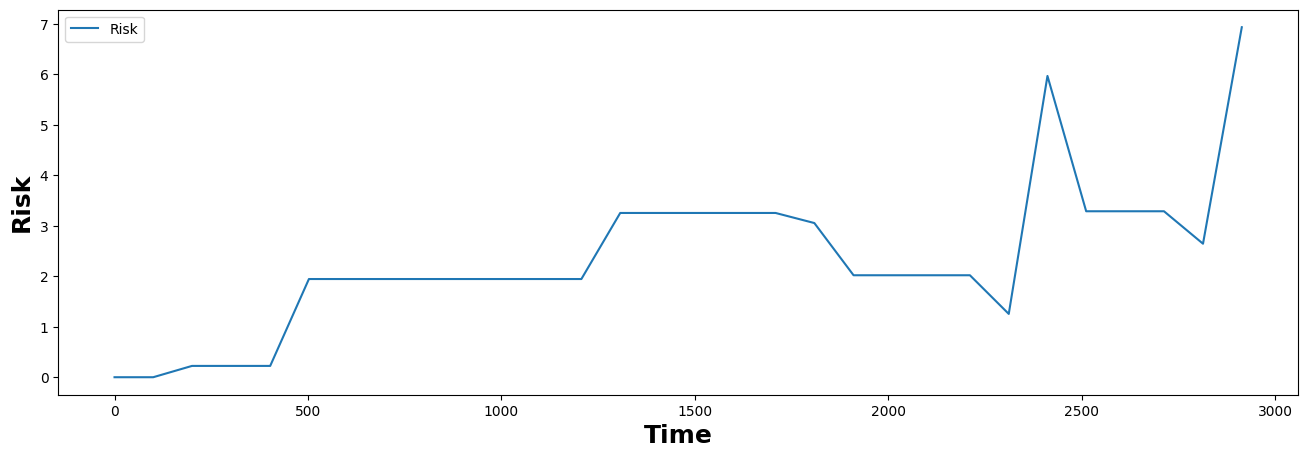

In [19]:
evaluation.visualize_risk()

In [20]:
# evaluation = execute_ai_model(start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)

In [4]:
for i in range(num_iterations):
    evaluation = execute_ai_model(start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, 
                                  new_network=new_network, attacker_sensitivity=attacker_sensitivity, model_path='AI_model/models_joo_kai/main_network_parameter_set_6.h5')
    evaluations.append(evaluation._security_metric_record)

OSError: No file or directory found at AI_model/main_network_parameter_set_6.h5

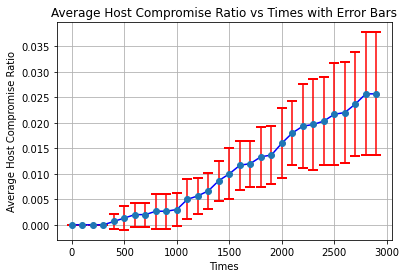

In [6]:
visualize_metric_ratio(evaluations, 'host_compromise_ratio')

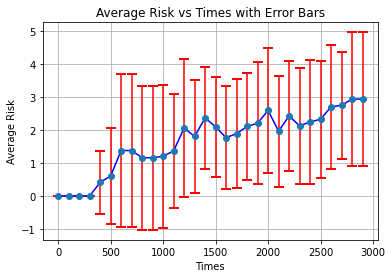

In [7]:
visualize_metric_ratio(evaluations, 'risk')

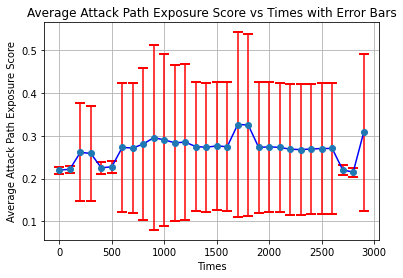

In [8]:
visualize_metric_ratio(evaluations, 'attack_path_exposure_score')

In [9]:
evaluations = []
attacker_sensitivity = 0.5
for i in range(num_iterations):
    evaluation = execute_ai_model(start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, 
                                  new_network=new_network, attacker_sensitivity=attacker_sensitivity, model_path='AI_model/main_network_mtd_ai_attacker_small_1.h5')
    evaluations.append(evaluation._security_metric_record)

Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metri

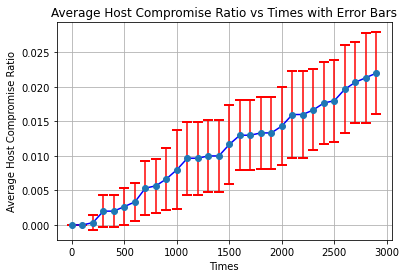

In [10]:
visualize_metric_ratio(evaluations, 'host_compromise_ratio')

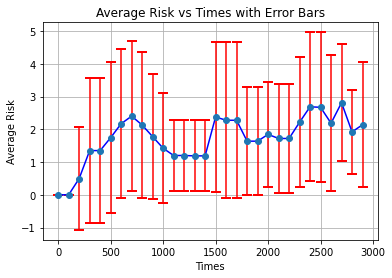

In [11]:
visualize_metric_ratio(evaluations, 'risk')

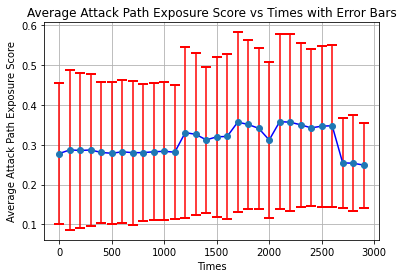

In [12]:
visualize_metric_ratio(evaluations, 'attack_path_exposure_score')

In [13]:
evaluations = []
attacker_sensitivity = 0.1
for i in range(num_iterations):
    evaluation = execute_ai_model(start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, 
                                  new_network=new_network, attacker_sensitivity=attacker_sensitivity, model_path='AI_model/main_network_mtd_ai_attacker_small_1.h5')
    evaluations.append(evaluation._security_metric_record)

Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metri

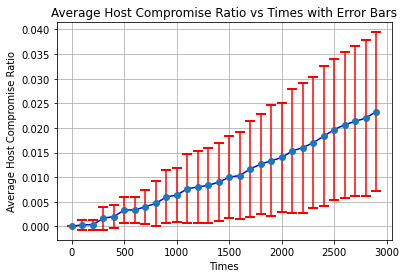

In [14]:
visualize_metric_ratio(evaluations, 'host_compromise_ratio')

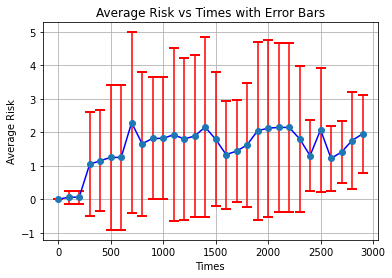

In [15]:
visualize_metric_ratio(evaluations, 'risk')

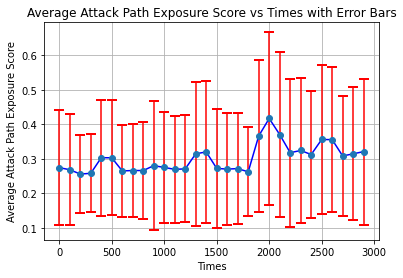

In [16]:
visualize_metric_ratio(evaluations, 'attack_path_exposure_score')